<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Evaluating-Model-Performance/LSTM_B_T_Median_optimized%20model_evaluate%20model%20performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Don't display "warnings"
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# Loading essentials
from numpy import loadtxt
from numpy import reshape
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Load data
dataset = loadtxt('B-T-median.csv', delimiter = ',')

In [0]:
# Reshape 2D dataset into a 3D dataset with columns as features with one time-step
x = dataset.reshape(56, 1, 30)

In [26]:
#Specify binary output of good (1) and bad (0) learners, y, in x. Learner type differentiated by population median.
y_true = x [:, :, -1]
print (y_true)

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [0]:
# Define LSTM One-to-One Model with 3 LSTM cells (determined via hyperparameter optimization). Sigmoid activation on the output layer for binary classification.
model = Sequential()
model.add(LSTM(3, input_shape=(1,30)))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#Fit the model with a 80-20 split of dataset & shuffling sample order within an epoch. Batch size updated to 8 to be an even factor of sample size of 56.
history = model.fit(x, y_true, validation_split = 0.2, batch_size = 8, epochs = 1000, shuffle = True, verbose=0)

In [30]:
#Evaluate the model
evaluate = model.evaluate(x, y_true, verbose=1)

56/56 [==============================] - 0s 103us/step


In [31]:
# Make predictions
y_pred = model.predict_classes(x)
print (y_pred)

[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [32]:
# Determine and print Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[26,  0],
       [ 0, 30]])

In [33]:
# Determine and print Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

1.0

In [34]:
# Determine and print Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

1.0

In [35]:
#Determine and print Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

1.0

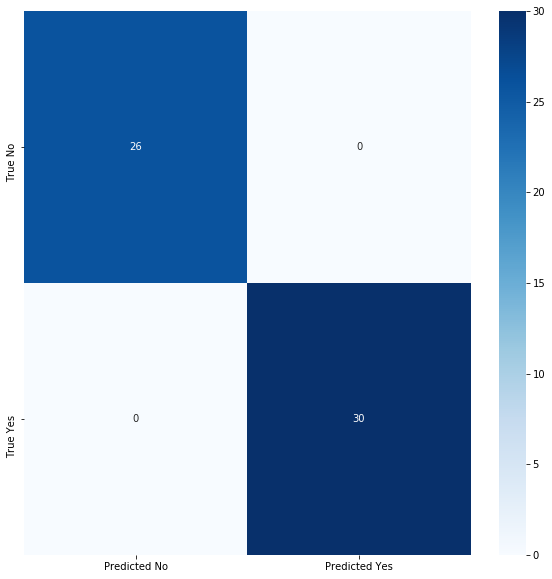

In [51]:
# Make pretty Confusion Matrix with Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ylabels=['True No', 'True Yes']
xlabels=['Predicted No', 'Predicted Yes']
cm = confusion_matrix(y_true, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=xlabels, yticklabels=ylabels)
bottom, top = ax.get_ylim()
plt.show()